In [ ]:
#Imports
import pandas as pd
import requests
import matplotlib.pyplot as plt
import json
import numpy as np
from pandas.api.types import is_string_dtype
import os
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import pandas as pd
%matplotlib inline
plt.rcParams['font.size'] = 24
from IPython.core.pylabtools import figsize
from sklearn.preprocessing import StandardScaler,Normalizer,FunctionTransformer,QuantileTransformer,PowerTransformer
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression,HuberRegressor,Lasso,BayesianRidge,Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
import warnings
from sklearn.svm import SVR
import statsmodels.api as sm
import re



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#res=pd.read_csv('res_bron_2020.csv')
edu=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/edu_bro_2020.csv')
#off=pd.read_csv('off_man_2020.csv')

In [ ]:
#res.drop('Unnamed: 0',axis=1, inplace=True)
edu.drop('Unnamed: 0',axis=1, inplace=True)
#off.drop('Unnamed: 0',axis=1, inplace=True)

In [ ]:
edu.shape

(513, 24)

In [ ]:
sc=StandardScaler()
standard=edu.copy()
sub=standard.select_dtypes(include=[np.number])
standard[sub.columns[1:22]]=sc.fit_transform(standard[sub.columns[1:22]])
standard.head()

,score,largest_property_use_type_gross_floor_area_ft,year_built,number_of_buildings,occupancy,site_eui_kbtu_ft,weather_normalized_site_electricity_intensity_kwh_ft,green_power_offsite_kwh,egrid_output_emissions_rate_kgco2e_mbtu,percent_of_electricity_that_is_green_power,...,multifamily_housing_percent_that_can_be_cooled,multifamily_housing_percent_that_can_be_heated,water_use_all_water_sources_kgal,number_of_active_energy_meters_total,number_of_active_energy_meters_not_used_to_compute_metrics,number_of_active_it_meters,community_board,census_tract,longitude,latitude
0,83.0,-0.223957,-0.600327,-0.312013,0.160053,0.588860,-0.432339,0.0,0.0,0.0,...,2.842171e-14,0.0,1.010765e-16,-0.060327,0.0,0.0,-0.362129,-0.222781,-73.986534,40.661061
1,76.0,-0.481359,-1.110894,-0.312013,0.160053,-0.058932,-0.349318,0.0,0.0,0.0,...,2.842171e-14,0.0,-6.307206e-01,-0.060327,0.0,0.0,0.557535,-0.215760,-73.987396,40.621871
2,78.0,-0.117968,0.197434,-0.312013,0.160053,0.223834,-0.044909,0.0,0.0,0.0,...,2.842171e-14,0.0,1.010765e-16,-1.134076,0.0,0.0,-1.281792,-0.216721,-73.960659,40.685050
3,79.0,0.352989,-0.313133,-0.312013,0.160053,0.902473,-0.543033,0.0,0.0,0.0,...,2.842171e-14,0.0,-4.470371e-01,-0.060327,0.0,0.0,-1.281792,-0.019396,-73.978215,40.695633
4,89.0,1.169042,0.325076,-0.312013,0.160053,-0.028085,-0.432339,0.0,0.0,0.0,...,2.842171e-14,0.0,1.010765e-16,-0.060327,0.0,0.0,-1.465725,-0.194698,-73.953146,40.703624


In [ ]:
sc=Normalizer()
normalized=edu.copy()
sub=normalized.select_dtypes(include=[np.number])
normalized[sub.columns[1:22]]=sc.fit_transform(normalized[sub.columns[1:22]])
normalized.head()

,score,largest_property_use_type_gross_floor_area_ft,year_built,number_of_buildings,occupancy,site_eui_kbtu_ft,weather_normalized_site_electricity_intensity_kwh_ft,green_power_offsite_kwh,egrid_output_emissions_rate_kgco2e_mbtu,percent_of_electricity_that_is_green_power,...,multifamily_housing_percent_that_can_be_cooled,multifamily_housing_percent_that_can_be_heated,water_use_all_water_sources_kgal,number_of_active_energy_meters_total,number_of_active_energy_meters_not_used_to_compute_metrics,number_of_active_it_meters,community_board,census_tract,longitude,latitude
0,83.0,0.999733,0.020882,0.000011,0.001082,0.000753,0.000044,0.0,0.000860,0.0,...,0.001080,0.001082,0.008872,0.000032,0.0,0.0,0.003322,0.001612,-73.986534,40.661061
1,76.0,0.999627,0.026573,0.000014,0.001388,0.000791,0.000061,0.0,0.001104,0.0,...,0.001386,0.001388,0.001536,0.000042,0.0,0.0,0.004332,0.003388,-73.987396,40.621871
2,78.0,0.999770,0.019390,0.000010,0.000992,0.000620,0.000055,0.0,0.000789,0.0,...,0.000990,0.000992,0.008133,0.000020,0.0,0.0,0.002995,0.002291,-73.960659,40.685050
3,79.0,0.999675,0.014033,0.000007,0.000724,0.000548,0.000027,0.0,0.000575,0.0,...,0.000722,0.000724,0.002296,0.000022,0.0,0.0,0.002186,0.020996,-73.978215,40.695633
4,89.0,0.999940,0.009659,0.000005,0.000493,0.000284,0.000020,0.0,0.000392,0.0,...,0.000492,0.000493,0.004043,0.000015,0.0,0.0,0.001484,0.002608,-73.953146,40.703624


In [ ]:
X=edu.drop('score', axis=1)
y=edu['score']
X_n=normalized.drop('score', axis=1)
y_n=normalized['score']
X_r=standard.drop('score', axis=1)
y_r=standard['score']

In [ ]:
# X=features.drop('score', axis=1)
# y=feat['score']
# X_n=normalized.drop('score', axis=1)
# y_n=normalized['score']
# X_r=standard.drop('score', axis=1)
# y_r=standard['score']

In [ ]:
# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(328, 23)
(82, 23)
(103, 23)
(328,)
(82,)
(103,)


In [ ]:
# Standardized
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_r, y_r, test_size = 0.2, random_state = 42)
X_train_r, X_val_r, y_train_r, y_val_r = train_test_split(X_train_r, y_train_r, test_size=0.20, random_state=1)


In [ ]:
# normalized
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size = 0.2, random_state = 42)
X_train_n, X_val_n, y_train_n, y_val_n = train_test_split(X_train_n, y_train_n, test_size=0.20, random_state=1)


In [ ]:
from sklearn.model_selection import KFold

In [ ]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))
baseline_guess = np.median(y_train)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 79.00
Baseline Performance on the test set: MAE = 17.9029


In [ ]:
nam=['Ada Boost','Decision Tree','Gradient Boost', 'SVM', 'Random Forest']



In [ ]:
def ada(X_train, X_val, y_train, y_val, X_test, y_test):
    
    # fit the regressor with val data
    regressor = AdaBoostRegressor() 
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    y_val_pred = regressor.predict(X_val)
    #fit test on extracted features 
    
    print('MAE train: %.3f, val: %.3f' % (mean_absolute_error(y_train, y_train_pred),mean_absolute_error(y_val, y_val_pred)))
    #print('MSE test: %.3f'  % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    #print('R^2 test: %.3f'% r2_score(y_test, y_test_pred))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

In [ ]:
def ada_h(X_train, X_val, y_train, y_val, X_test, y_test):
    
    params = {'learning_rate': 0.5, 'loss': 'exponential', 'n_estimators': 100}
    
    # fit the regressor with val data
    regressor = AdaBoostRegressor(**params) 
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    y_val_pred = regressor.predict(X_val)
    #fit test on extracted features 
    
    print('MAE train: %.3f, val: %.3f' % (mean_absolute_error(y_train, y_train_pred),mean_absolute_error(y_val, y_val_pred)))
    #print('MSE test: %.3f'  % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    #print('R^2 test: %.3f'% r2_score(y_test, y_test_pred))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

#     feature_importances = regressor.feature_importances_
#     sorted_idxs = np.argsort(feature_importances)[:5]
#     poss = np.arange(sorted_idxs.shape[0]) + 0.5
#     fig = plt.figure(figsize=(6, 7))
#     plt.subplot(1, 2, 1)
#     plt.barh(poss, feature_importances[sorted_idxs], align="center")
#     plt.yticks(poss, np.array(features.columns)[sorted_idxs])
#     plt.title("Feature Importance (MDI)")    
    
    fig = plt.figure(figsize=(7, 6))

    plt.scatter(y_val_pred,  
                y_val_pred - y_val, 
                c='limegreen',
                edgecolor='white',
                marker='s', 
                s=35,
                alpha=0.9,
                label='Test data')
    plt.scatter(y_train_pred,  
                y_train_pred - y_train, 
                c='steelblue',
                edgecolor='white',
                marker='o', 
                s=35,
                alpha=0.7,
                label='Training data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
    plt.xlim([-10, 120])
    plt.tight_layout()

    #plt.savefig('GBR.png', dpi=300)
    plt.show()    


In [ ]:
ada(X_train, X_val, y_train, y_val, X_test, y_test )

MAE train: 8.514, val: 8.373
R^2 train: 0.811, val: 0.833


In [ ]:
ada(X_train_n, X_val_n, y_train_n, y_val_n, X_test_n, y_test_n )

MAE train: 12.167, val: 13.809
R^2 train: 0.648, val: 0.542


In [ ]:
ada(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

MAE train: 8.567, val: 9.166
R^2 train: 0.811, val: 0.810


MAE train: 8.808, val: 9.288
R^2 train: 0.804, val: 0.804


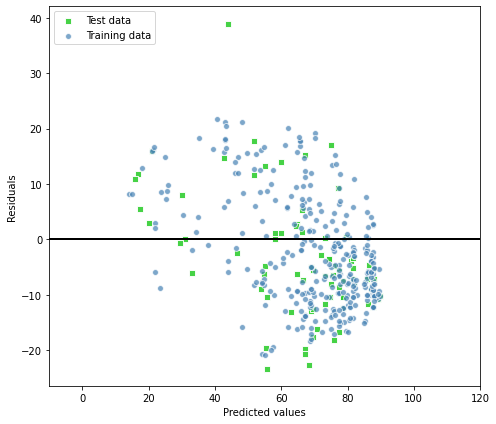

In [ ]:
ada_h(X_train, X_val, y_train, y_val, X_test, y_test )

In [ ]:
def dtree(X_train, X_val, y_train, y_val, X_test, y_test):
    
    # fit the regressor with val data
    regressor = DecisionTreeRegressor() 
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    y_val_pred = regressor.predict(X_val)
    #fit test on extracted features 
    
    print('MAE train: %.3f, val: %.3f' % (mean_absolute_error(y_train, y_train_pred),mean_absolute_error(y_val, y_val_pred)))
    #print('MSE test: %.3f'  % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    #print('R^2 test: %.3f'% r2_score(y_test, y_test_pred))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

In [ ]:
def dtree_h(X_train, X_val, y_train, y_val, X_test, y_test):
    
    params = {'max_depth': 12, 'max_features': None, 'max_leaf_nodes': 10, 'min_samples_leaf': 4, 'splitter': 'random'}
    
    # fit the regressor with val data
    regressor = DecisionTreeRegressor(**params) 
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    y_val_pred = regressor.predict(X_val)
    y_test_pred=regressor.predict(X_test)
    
    #print('MSE train: %.3f, val: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_val, y_val_pred)))
    print('MAE test: %.3f' % mean_absolute_error(y_test, y_test_pred))
    
    print('R^2 test: %.3f' % (r2_score(y_test, y_test_pred)))
    

#     feature_importances = reg.feature_importances_
#     sorted_idxs = np.argsort(feature_importances)[:5]
#     poss = np.arange(sorted_idxs.shape[0]) + 0.5
#     fig = plt.figure(figsize=(6, 7))
#     plt.subplot(1, 2, 1)
#     plt.barh(poss, feature_importances[sorted_idxs], align="center")
#     plt.yticks(poss, np.array(res.columns)[sorted_idxs])
#     plt.title("Feature Importance (MDI)")    
    
#     fig = plt.figure(figsize=(7, 6))

    plt.scatter(y_test_pred,  
                y_test_pred - y_test, 
                c='limegreen',
                edgecolor='white',
                marker='s', 
                s=35,
                alpha=0.9,
                label='Test data')
    plt.scatter(y_train_pred,  
                y_train_pred - y_train, 
                c='steelblue',
                edgecolor='white',
                marker='o', 
                s=35,
                alpha=0.2,
                label='Training data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
    plt.xlim([-10, 120])
    plt.tight_layout()

    #plt.savefig('GBR.png', dpi=300)
    plt.show()    


In [ ]:
dtree(X_train, X_val, y_train, y_val, X_test, y_test )

MAE train: 0.000, val: 10.463
R^2 train: 1.000, val: 0.727


In [ ]:
dtree(X_train_n, X_val_n, y_train_n, y_val_n, X_test_n, y_test_n )

MAE train: 0.000, val: 12.646
R^2 train: 1.000, val: 0.467


In [ ]:
dtree(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

MAE train: 0.000, val: 10.171
R^2 train: 1.000, val: 0.739


MAE test: 8.550
R^2 test: 0.750


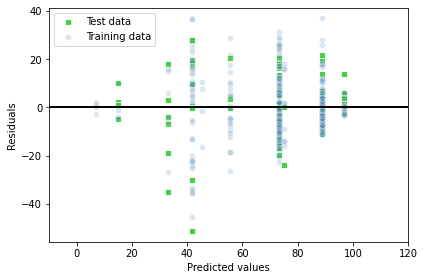

In [ ]:
dtree_h(X_train, X_val, y_train, y_val, X_test, y_test )

In [ ]:
def gbr(X_train, X_val, y_train, y_val, X_test, y_test ):

    #val
    reg =  xgboost.XGBRegressor()
    reg.fit(X_train, y_train)
    y_train_pred=reg.predict(X_train)
    y_val_pred=reg.predict(X_val)
    #test
    #y_test_pred=reg.predict(X_test)
    
    print('MAE train: %.3f, val: %.3f' % (mean_absolute_error(y_train, y_train_pred),mean_absolute_error(y_val, y_val_pred)))
    #print('MSE test: %.3f' % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

In [ ]:
from matplotlib import pyplot

In [ ]:
def gbr_h(X_train, X_val, y_train, y_val, X_test, y_test ):

    #params = {'learning_rate': 0.02, 'max_depth': 6, 'n_estimators': 500, 'subsample': 0.5}
    #params = {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500}
    #params={'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.5}
    params={'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 50, 'subsample': 0.2}
    #val
    reg = xgboost.XGBRegressor(**params)
    reg.fit(X_train, y_train)
    y_train_pred=reg.predict(X_train)
    y_val_pred=reg.predict(X_val)
    #test
    y_test_pred=reg.predict(X_test)
    
    #print('MSE train: %.3f, val: %.3f' % (mean_absolute_error(y_train, y_train_pred),mean_squared_error(y_val, y_val_pred)))
    print('MAE test: %.3f' % mean_absolute_error(y_test, y_test_pred))
    
    print('R^2 test: %.3f' % (r2_score(y_test, y_test_pred)))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

    importance = reg.feature_importances_
    # summarize feature importance
    for i,v in enumerate(importance):
      print('Feature: %0d, Score: %.5f' % (i,v))
    # plot feature importance
    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.show()
    
    fig = plt.figure(figsize=(7, 6))

    plt.scatter(y_test_pred,  
                y_test_pred - y_test, 
                c='limegreen',
                edgecolor='white',
                marker='s', 
                s=35,
                alpha=0.9,
                label='Test data')
    plt.scatter(y_train_pred,  
                y_train_pred - y_train, 
                c='steelblue',
                edgecolor='white',
                marker='o', 
                s=35,
                alpha=0.7,
                label='Training data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
    plt.xlim([-10, 120])
    plt.tight_layout()

    #plt.savefig('GBR.png', dpi=300)
    plt.show()    


In [ ]:
#!pip install xgboost

In [ ]:
# check xgboost version
import xgboost

In [ ]:
gbr(X_train, X_val, y_train, y_val, X_test, y_test )

[11:36:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE train: 4.363, val: 6.993
R^2 train: 0.938, val: 0.862


In [ ]:
gbr(X_train_n, X_val_n, y_train_n, y_val_n, X_test_n, y_test_n )

[11:36:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE train: 4.368, val: 10.133
R^2 train: 0.938, val: 0.628


In [ ]:
gbr(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

[11:36:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE train: 4.363, val: 7.005
R^2 train: 0.938, val: 0.862


[23:43:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE test: 8.290
R^2 test: 0.791
Feature: 0, Score: 0.03611
Feature: 1, Score: 0.05202
Feature: 2, Score: 0.02005
Feature: 3, Score: 0.07330
Feature: 4, Score: 0.26426
Feature: 5, Score: 0.27406
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.04958
Feature: 16, Score: 0.04285
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.04876
Feature: 20, Score: 0.04536
Feature: 21, Score: 0.04719
Feature: 22, Score: 0.04644


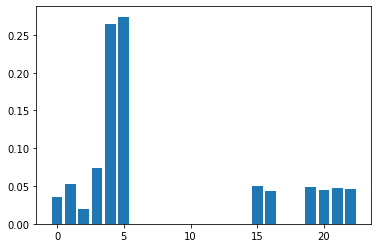

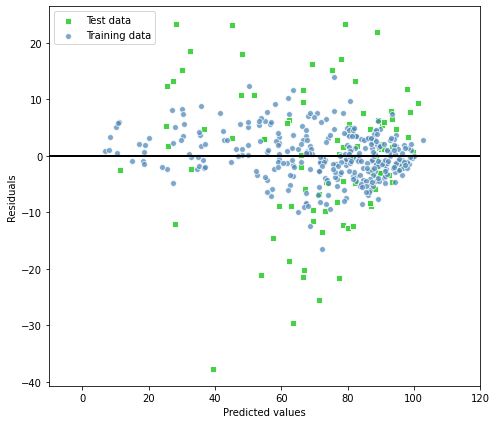

In [ ]:
gbr_h(X_train, X_val, y_train, y_val, X_test, y_test )

In [ ]:
gbr_h(X_train, X_val, y_train, y_val, X_test, y_test )

In [ ]:
from sklearn.svm import SVR

In [ ]:
def svr(X_train, X_val, y_train, y_val, X_test, y_test ):
    params = {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
    #val
    reg = SVR(**params)
    reg.fit(X_train, y_train)
    y_train_pred=reg.predict(X_train)
    y_val_pred=reg.predict(X_val)
    #test
    #y_test_pred=reg.predict(X_test)
    
    print('MAE train: %.3f, val: %.3f' % (mean_absolute_error(y_train, y_train_pred),mean_absolute_error(y_val, y_val_pred)))
    #print('MSE test: %.3f' % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))
    

In [ ]:
def svr_h(X_train, X_val, y_train, y_val, X_test, y_test ):

    params = {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
    
    #val
    reg = SVR(**params)
    reg.fit(X_train, y_train)
    y_train_pred=reg.predict(X_train)
    y_val_pred=reg.predict(X_test)
    #test
    y_test_pred=reg.predict(X_test)
    
    #print('MSE train: %.3f, val: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_val, y_val_pred)))
    print('MAE test: %.3f' % mean_absolute_error(y_test, y_test_pred))
    
    print('R^2 test: %.3f' % (r2_score(y_test, y_test_pred)))
    

#     feature_importances = reg.feature_importances_
#     sorted_idxs = np.argsort(feature_importances)[:5]
#     poss = np.arange(sorted_idxs.shape[0]) + 0.5
#     fig = plt.figure(figsize=(6, 7))
#     plt.subplot(1, 2, 1)
#     plt.barh(poss, feature_importances[sorted_idxs], align="center")
#     plt.yticks(poss, np.array(res.columns)[sorted_idxs])
#     plt.title("Feature Importance (MDI)")    
    
#     fig = plt.figure(figsize=(7, 6))

    plt.scatter(y_test_pred,  
                y_test_pred - y_test, 
                c='limegreen',
                edgecolor='white',
                marker='s', 
                s=35,
                alpha=0.9,
                label='Test data')
    plt.scatter(y_train_pred,  
                y_train_pred - y_train, 
                c='steelblue',
                edgecolor='white',
                marker='o', 
                s=35,
                alpha=0.2,
                label='Training data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
    plt.xlim([-10, 120])
    plt.tight_layout()

    #plt.savefig('GBR.png', dpi=300)
    plt.show()    


In [ ]:
svr(X_train, X_val, y_train, y_val, X_test, y_test )

MAE train: 0.100, val: 20.030
R^2 train: 1.000, val: -0.005


In [ ]:
svr(X_train_n, X_val_n, y_train_n, y_val_n, X_test_n, y_test_n )

MAE train: 16.827, val: 19.926
R^2 train: 0.009, val: -0.147


In [ ]:
svr(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

MAE train: 0.360, val: 17.025
R^2 train: 0.992, val: 0.182


MAE test: 7.912
R^2 test: 0.797


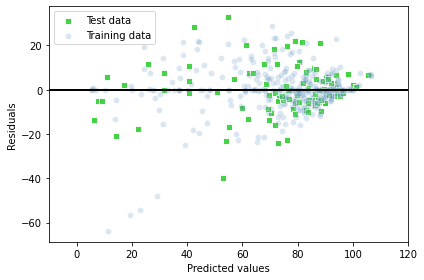

In [ ]:
svr_h(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

In [ ]:
def rf(X_train, X_val, y_train, y_val, X_test, y_test ):

    #val
    reg = RandomForestRegressor()
    reg.fit(X_train, y_train)
    y_train_pred=reg.predict(X_train)
    y_val_pred=reg.predict(X_val)
    #test
    #y_test_pred=reg.predict(X_test)
    
    print('MAE train: %.3f, val: %.3f' % (mean_absolute_error(y_train, y_train_pred),mean_absolute_error(y_val, y_val_pred)))
    #print('MSE test: %.3f' % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

In [ ]:
def rf_h(X_train, X_val, y_train, y_val, X_test, y_test ):
    
    params = {'bootstrap': True, 'criterion': 'squared_error', 'max_depth': 50, 'max_features': 'auto', 'n_estimators': 20}
    #'bootstrap': True, 'criterion': 'absolute_error', 'max_depth': 30, 'max_features': 'auto', 'n_estimators': 5
    #val
    reg = RandomForestRegressor(**params)
    reg.fit(X_train, y_train)
    y_train_pred=reg.predict(X_train)
    y_val_pred=reg.predict(X_val)
    #test
    y_test_pred=reg.predict(X_test)
    
    #print('MSE train: %.3f, val: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_val, y_val_pred)))
    print('MAE test: %.3f' % mean_absolute_error(y_test, y_test_pred))
    
    print('R^2 test: %.3f' % (r2_score(y_test, y_test_pred)))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

    importance = reg.feature_importances_
    # summarize feature importance
    for i,v in enumerate(importance):
      print('Feature: %0d, Score: %.5f' % (i,v))
    # plot feature importance
    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.show()    
    
    fig = plt.figure(figsize=(7, 6))

    plt.scatter(y_test_pred,  
                y_test_pred - y_test, 
                c='limegreen',
                edgecolor='white',
                marker='s', 
                s=35,
                alpha=0.9,
                label='Test data')
    plt.scatter(y_train_pred,  
                y_train_pred - y_train, 
                c='steelblue',
                edgecolor='white',
                marker='o', 
                s=35,
                alpha=0.2,
                label='Training data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
    plt.xlim([-10, 120])
    plt.tight_layout()

    #plt.savefig('GBR.png', dpi=300)
    plt.show()    


In [ ]:
rf(X_train, X_val, y_train, y_val, X_test, y_test )

MAE train: 3.361, val: 6.939
R^2 train: 0.956, val: 0.864


In [ ]:
rf(X_train_n, X_val_n, y_train_n, y_val_n, X_test_n, y_test_n )

MAE train: 4.018, val: 10.474
R^2 train: 0.943, val: 0.629


In [ ]:
rf(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

MAE train: 3.312, val: 6.978
R^2 train: 0.959, val: 0.863


MAE test: 7.825
R^2 test: 0.807
Feature: 0, Score: 0.02594
Feature: 1, Score: 0.02944
Feature: 2, Score: 0.00069
Feature: 3, Score: 0.00580
Feature: 4, Score: 0.44470
Feature: 5, Score: 0.40977
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.01264
Feature: 16, Score: 0.00537
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.01527
Feature: 20, Score: 0.01815
Feature: 21, Score: 0.01420
Feature: 22, Score: 0.01802


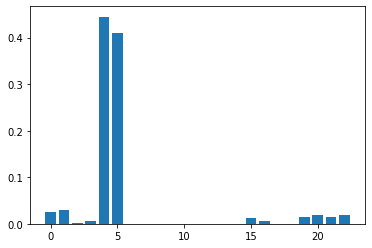

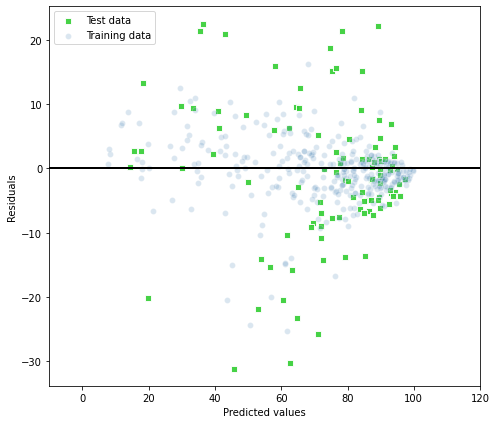

In [ ]:
rf_h(X_train, X_val, y_train, y_val, X_test, y_test)

In [ ]:
X.columns[19]

'community_board'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  


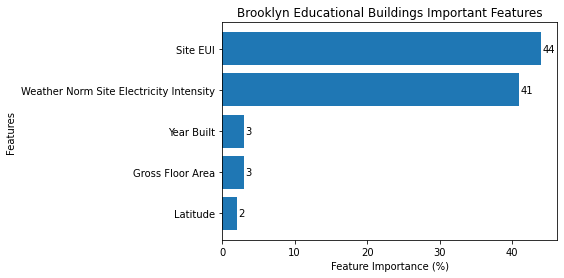

In [ ]:
fea=['Site EUI','Weather Norm Site Electricity Intensity','Year Built',
 'Gross Floor Area',
 'Latitude']
num=[44,41,3,3,2]

fig, ax = plt.subplots()

# Example data

y_pos = np.arange(len(fea))


ax.barh(fea, num )
ax.set_yticks(y_pos, fea)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Feature Importance (%)')
ax.set_ylabel('Features ')
ax.set_title('Brooklyn Educational Buildings Important Features')
for i, v in enumerate(num):
    plt.text(v+0.2, i, str(round(v, 2)), va="center")
plt.show()

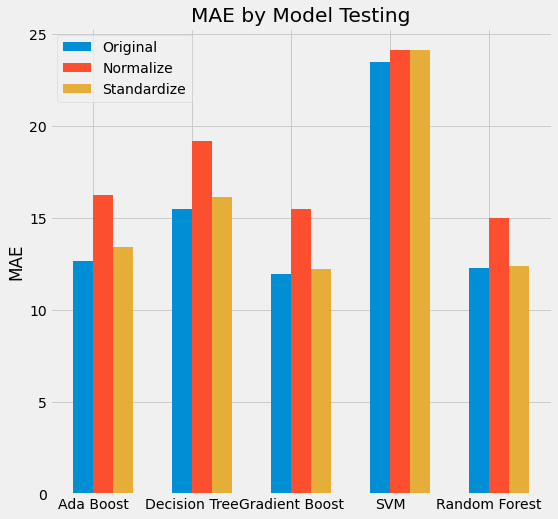

<Figure size 3600x720 with 0 Axes>

In [ ]:
#reg
same=[12.65,15.49,11.94,23.48,12.27]
norm=[16.23,19.16,15.48,24.13,15.01]
stand=[13.45,16.13,12.21,24.12,12.41]
x = np.arange(len(nam))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
plt.figure(figsize=(50,10))
rects1 = ax.bar(x - width/2, same, width, label='Original')
rects2 = ax.bar(x + width/2, norm, width, label='Normalize')
rects3 = ax.bar(x + 3*width/2, stand, width, label='Standardize')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MAE')
ax.set_title('MAE by Model Testing')
ax.set_xticks(x, nam)
ax.legend()

# ax.bar_label(rects1, padding=10)
# ax.bar_label(rects2, padding=10)
# ax.bar_label(rects3, padding=10)

#fig.tight_layout()

plt.show()

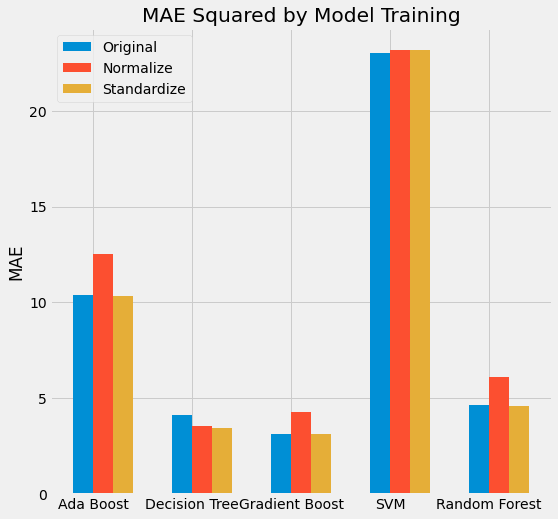

<Figure size 3600x720 with 0 Axes>

In [ ]:
#r2
same=[10.37, 4.11,3.12,23.00,4.66]
norm=[12.50,3.56,4.27,23.16,6.13]
stand=[10.33,3.43,3.12,23.14,4.61]
x = np.arange(len(nam))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
plt.figure(figsize=(50,10))
rects1 = ax.bar(x - width/2, same, width, label='Original')
rects2 = ax.bar(x + width/2, norm, width, label='Normalize')
rects3 = ax.bar(x + 3*width/2, stand, width, label='Standardize')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MAE')
ax.set_title('MAE Squared by Model Training')
ax.set_xticks(x, nam)
ax.legend()

# ax.bar_label(rects1, padding=10)
# ax.bar_label(rects2, padding=10)
# ax.bar_label(rects3, padding=10)

#fig.tight_layout()

plt.show()

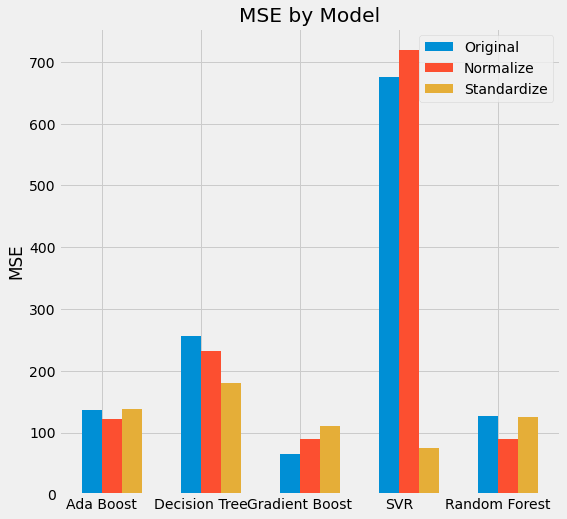

<Figure size 3600x720 with 0 Axes>

In [ ]:
#hyper
same=[136.76,256.92,64.66, 675.61,125.99]
norm=[122.33,232.58,90.25,719.21,89.53]
stand=[137.70,179.62,110.49,74.42,125.71]
x = np.arange(len(nam))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
plt.figure(figsize=(50,10))
rects1 = ax.bar(x - width/2, same, width, label='Original')
rects2 = ax.bar(x + width/2, norm, width, label='Normalize')
rects3 = ax.bar(x + 3*width/2, stand, width, label='Standardize')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MSE')
ax.set_title('MSE by Model')
ax.set_xticks(x, nam)
ax.legend()

# ax.bar_label(rects1, padding=10)
# ax.bar_label(rects2, padding=10)
# ax.bar_label(rects3, padding=10)

#fig.tight_layout()

plt.show()

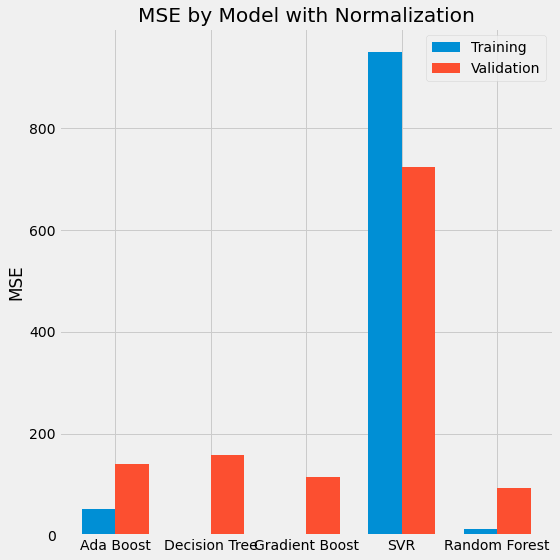

In [ ]:
rtr2=[round(num,2) for num in mse_tr2]
rte2=[round(num,2) for num in mse_te2]

x = np.arange(len(nam))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rtr2, width, label='Training')
rects2 = ax.bar(x + width/2, rte2, width, label='Validation')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MSE')
ax.set_title('MSE by Model with Normalization')
ax.set_xticks(x, nam)
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

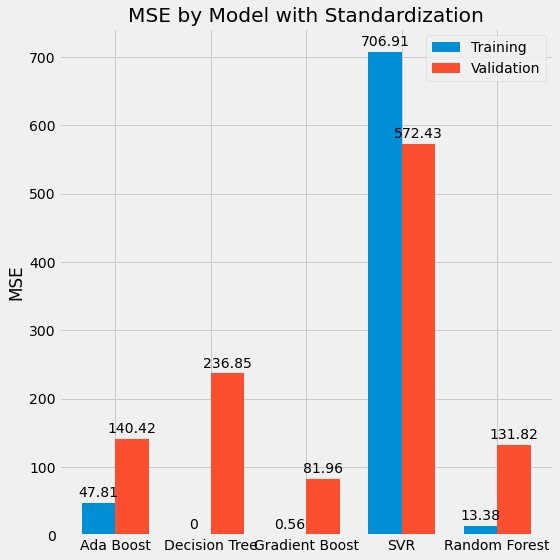

In [ ]:
rtr3=[round(num,2) for num in mse_tr3]
rte3=[round(num,2) for num in mse_te3]

x = np.arange(len(nam))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rtr3, width, label='Training')
rects2 = ax.bar(x + width/2, rte3, width, label='Validation')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MSE')
ax.set_title('MSE by Model with Standardization')
ax.set_xticks(x, nam)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

HYPERPARAMETER TUNING

In [ ]:
import xgboost

In [ ]:
from sklearn.metrics import make_scorer
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

In [ ]:
parameters = {'learning_rate': [0.1,0.2,0.3,0.4],
                  'subsample'    : [1,.9,.7, .5, .2, .1],
                  'n_estimators' : [50,100,200,500,1000, 1500],
                  'max_depth'    : [1,2,3,4,6,8,10],
               
                 }

#{ 'learning_rate': 0.1, 'max_depth': 3,  'n_estimators': 100, 'n_jobs': 1,'subsample': 1}

GBR = xgboost.XGBRegressor()
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

[18:50:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBRegressor(max_depth=1, n_estimators=50, subsample=0.2)

 The best score across ALL searched params:
 0.6474336772688178

 The best parameters across ALL searched params:
 {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 50, 'subsample': 0.2}


In [ ]:
parameters = {
   'n_estimators': [5,20,50, 100, 200, 500,1000],
   'max_features': ['auto', 'sqrt', 'log2'],
   'criterion' :['squared_error', 'absolute_error'],
   'bootstrap' : [True, False],
   "max_depth" : [None,1,3,5,7,9,11,12],
   'min_samples_split' : [1,2,3,5,6,8,10], # minimum sample number to split a node
   "min_samples_leaf":[1,2,3,5,6,8,10]
}

#{'criterion': 'squared_error',  'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 100,  }

GBR = RandomForestRegressor()
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

In [ ]:
parameters = {"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]}
GBR = DecisionTreeRegressor()
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1,scoring=scorer)
grid_GBR.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

In [ ]:
parameters = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
GBR = SVR()
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1,scoring=scorer)
grid_GBR.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

In [ ]:
parameters = {
 'n_estimators': [100,500,1000, 1500],
 'learning_rate' : [0.01, 0.05, 0.1, 0.5],
 'loss' : ['linear', 'square', 'exponential']
 }
GBR = AdaBoostRegressor()
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1,scoring=scorer)
grid_GBR.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)